<a href="https://colab.research.google.com/github/maryom99/DICV_2023_M/blob/main/MODUL5_3I_Maryam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task Practicum 

## 1. Make a Gamma Correction.

In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from PIL import Image 
import matplotlib.pylab as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


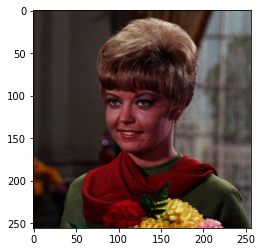

In [5]:
original = cv.imread('/content/drive/MyDrive/images_DICV/female.tiff')
image1 = cv.cvtColor(original,cv.COLOR_BGR2RGB)  # convert to RGB
plt.imshow(image1)

 Gamma Correction on the image 
----------------------------------
Enter the Gamma value: 3


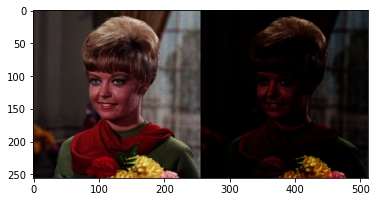

In [32]:
print(' Gamma Correction on the image ')
print('----------------------------------')
try: 
 gamma = int(input('Enter the Gamma value: '))
except ValueError:
 print('Error, not a number')

gamma_image = np.zeros(image1.shape, image1.dtype)

#access per pixel
for y in range(image1.shape[0]):
  for x in range(image1.shape[1]):
    for c in range(image1.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * (image1[y, x, c]/255) ** gamma, 0, 255)

final_frame = cv.hconcat((image1, gamma_image))
plt.imshow(final_frame)

## 2. Create Image Depth Simulation 

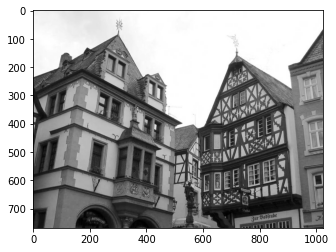

In [35]:
origina2 = cv.imread('/content/drive/MyDrive/images_DICV/old_house.jpg')
image2 = cv.cvtColor(origina2,cv.COLOR_BGR2RGB)  # convert to RGB
plt.imshow(image2)

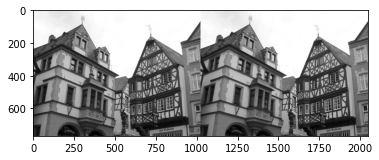

In [39]:
# Specify the bit depth
bit_depth = 7

# Compute the color levels using the formula
color_levels = float(255 / 2**bit_depth - 1)

# Create a new 7-bit depth image with the same dimensions as the original image
depth_image = np.zeros(image2.shape[:2], dtype=np.uint8)

# Access per pixel
for y in range(image2.shape[0]):
  for x in range(image2.shape[1]):
    
    # Compute the 7-bit color value
    color_7bit = float(image2[y, x].sum() / 3 / color_levels)

    # Scale the color value back to 8-bit for display
    color_8bit = color_7bit * color_levels

    # Set the pixel value in the depth image
    depth_image[y, x] = color_8bit

# Convert the depth image to RGB
depth_image_rgb = cv.cvtColor(depth_image, cv.COLOR_GRAY2RGB)

# Display the original and depth images side by side
final_frame = cv.hconcat((image2, depth_image_rgb))
plt.imshow(final_frame)

## 3. Create the Average Denoising module